# py.pandas

    Python Version:    Python 3.10.9
    Conda Version:     conda 23.1.0
    Conda Environment: jup
    Conda Path:        $HOME/.conda/envs/jup


In [221]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [116]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [117]:
data = pd.read_csv('Mobile phone price.csv')

In [118]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [119]:
data.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [120]:
data = data.rename(columns={
    'Storage ': 'storage',
    'RAM ': 'ram',
    'Price ($)': 'price',
    'Battery Capacity (mAh)': 'battery',
    'Camera (MP)': 'camera',
    'Screen Size (inches)': 'screen_size',
    'Brand': 'brand',
    'Model': 'model'
})

In [121]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [122]:
data[['brand', 'storage']].head()

,brand,storage
0,Apple,128 GB
1,Samsung,256 GB
2,OnePlus,128 GB
3,Xiaomi,128 GB
4,Google,128 GB


In [123]:
data['price'] = data['price'].apply(lambda x : f"${x.replace('$', '').strip()}")

In [124]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [125]:
data = data.applymap(lambda x : x.strip() if isinstance(x, str) else x)

In [126]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [127]:
data.apply(lambda x : x.tolist(), axis=1).head()

0    [Apple, iPhone 13 Pro, 128 GB, 6 GB, 6.1, 12 +...
1    [Samsung, Galaxy S21 Ultra, 256 GB, 12 GB, 6.8...
2    [OnePlus, 9 Pro, 128 GB, 8 GB, 6.7, 48 + 50 + ...
3    [Xiaomi, Redmi Note 10 Pro, 128 GB, 6 GB, 6.67...
4    [Google, Pixel 6, 128 GB, 8 GB, 6.4, 50 + 12.2...
dtype: object

In [128]:
data.apply(lambda x : x.tolist(), axis=1, result_type='expand').head()

,0,1,2,3,4,5,6,7
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [129]:
data.apply(lambda x : x.tolist(), axis=1, result_type='broadcast').head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [130]:
import pandas as pd

# create a Series of strings
s = pd.Series(['apple', 'orange', 'grape', 'banana'])

# define a dictionary to map values to new values
fruit_dict = {'apple': 'red', 'orange': 'orange', 'grape': 'purple', 'banana': 'yellow'}

# use map with the dictionary to replace values in the Series
s_color = s.map(fruit_dict)

print(s_color)


0       red
1    orange
2    purple
3    yellow
dtype: object


In [131]:
import pandas as pd

# create a Series of strings
s = pd.Series(['apple', 'orange', 'grape', 'pear', None, None])

# define a dictionary to map values to new values
fruit_dict = {'apple': 'red', 'orange': 'orange', 'grape': 'purple', 'banana': 'yellow'}

# use map with the dictionary and get method to replace values in the Series,
# setting a default value of 'unknown' for any keys not in the dictionary
s_color = s.map(fruit_dict.get, na_action='ignore')

print(s_color)


0       red
1    orange
2    purple
3      None
4      None
5      None
dtype: object


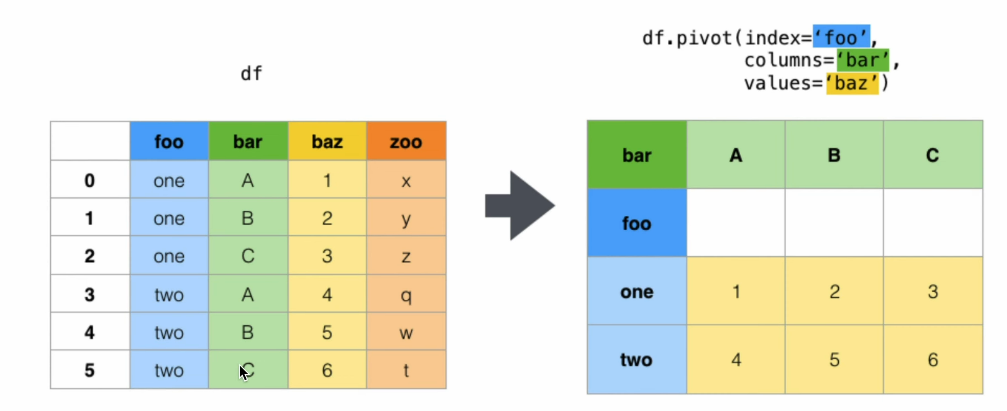

In [132]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [133]:
type(data.columns), dir(data.columns)

(pandas.core.indexes.base.Index,
 ['T',
  '__abs__',
  '__add__',
  '__and__',
  '__annotations__',
  '__array__',
  '__array_priority__',
  '__array_ufunc__',
  '__array_wrap__',
  '__bool__',
  '__class__',
  '__contains__',
  '__copy__',
  '__deepcopy__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__divmod__',
  '__doc__',
  '__eq__',
  '__floordiv__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__getitem__',
  '__gt__',
  '__hash__',
  '__iadd__',
  '__init__',
  '__init_subclass__',
  '__invert__',
  '__iter__',
  '__le__',
  '__len__',
  '__lt__',
  '__mod__',
  '__module__',
  '__mul__',
  '__ne__',
  '__neg__',
  '__new__',
  '__nonzero__',
  '__or__',
  '__pos__',
  '__pow__',
  '__radd__',
  '__rand__',
  '__rdivmod__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__rfloordiv__',
  '__rmod__',
  '__rmul__',
  '__ror__',
  '__rpow__',
  '__rsub__',
  '__rtruediv__',
  '__rxor__',
  '__setattr__',
  '__setitem__',
  '__sizeof__',
  '__str__',
  '__sub__',
  

In [134]:
data.columns

Index(['brand', 'model', 'storage', 'ram', 'screen_size', 'camera', 'battery',
       'price'],
      dtype='object')

In [135]:
data.columns.difference(['price'])

Index(['battery', 'brand', 'camera', 'model', 'ram', 'screen_size', 'storage'], dtype='object')

In [136]:
data.columns.difference??

Signature: data.columns.difference(other, sort=None)
Source:   
    @final
    def difference(self, other, sort=None):
        """
        Return a new Index with elements of index not in `other`.

        This is the set difference of two Index objects.

        Parameters
        ----------
        other : Index or array-like
        sort : False or None, default None
            Whether to sort the resulting index. By default, the
            values are attempted to be sorted, but any TypeError from
            incomparable elements is caught by pandas.

            * None : Attempt to sort the result, but catch any TypeErrors
              from comparing incomparable elements.
            * False : Do not sort the result.

        Returns
        -------
        difference : Index

        Examples
        --------
        >>> idx1 = pd.Index([2, 1, 3, 4])
        >>> idx2 = pd.Index([3, 4, 5, 6])
        >>> idx1.difference(idx2)
        Int64Index([1, 2], dtype='int64')
        >

In [137]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [138]:
data.pivot_table(index='brand',
                 values='price',
                 aggfunc=np.max)

,price
brand,
Apple,$999
Asus,$999
Blackberry,$699
CAT,$299
Google,$799
Huawei,$999
LG,$999
Motorola,$99
Nokia,$99


In [139]:
data.pivot_table(index='brand',
                 values='price',
                 aggfunc='mean')

/tmp/ipykernel_3657073/2429998848.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data.pivot_table(index='brand',


""
brand
Apple
Asus
Blackberry
CAT
Google
Huawei
LG
Motorola
Nokia


In [140]:
# Create a pandas DataFrame
data2 = {
    'City': ['New York', 'New York', 'Boston', 'Boston', 'Chicago', 'Chicago'],
    'Year': [2019, 2020, 2019, 2020, 2019, 2020],
    'Sales': [100, 110, 120, 130, 140, 150]
}
df = pd.DataFrame(data2)

# Create a pivot table with mean values
pivot = pd.pivot_table(
    data=df,
    index='City',
    columns='Year',
    values='Sales',
    aggfunc='mean'
)

print(pivot)


Year      2019  2020
City                
Boston     120   130
Chicago    140   150
New York   100   110


In [151]:
mean_prices = data.pivot_table(index='brand',
                               values='price',
                               aggfunc=lambda x: np.mean(x.apply(lambda y : y.replace('$', '').replace(',', '')).astype('float64')))
mean_prices

,price
brand,
Apple,745.666667
Asus,874.000000
Blackberry,499.000000
CAT,299.000000
Google,699.000000
Huawei,783.166667
LG,615.666667
Motorola,278.130435
Nokia,244.714286


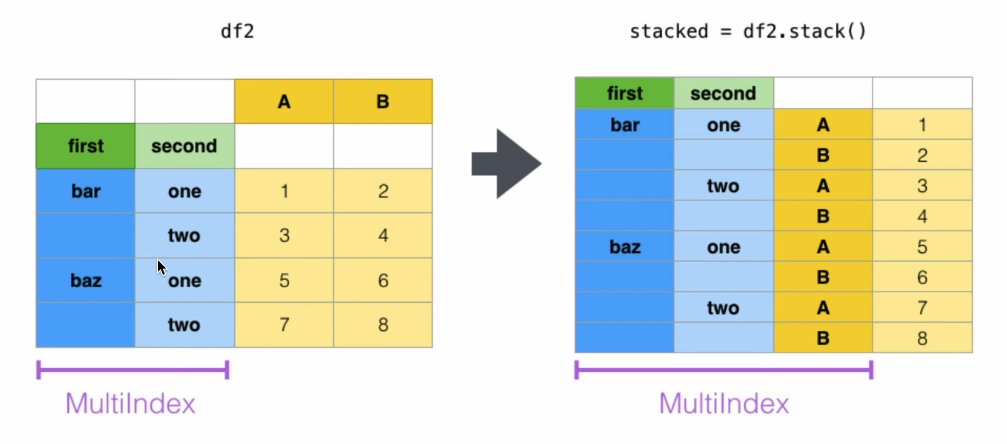

In [154]:
pd.DataFrame(mean_prices.stack())

,,0
brand,,
Apple,price,745.666667
Asus,price,874.000000
Blackberry,price,499.000000
CAT,price,299.000000
Google,price,699.000000
Huawei,price,783.166667
LG,price,615.666667
Motorola,price,278.130435
Nokia,price,244.714286


In [155]:
pd.DataFrame(mean_prices.unstack())

0
      brand                  
price Apple        745.666667
      Asus         874.000000
      Blackberry   499.000000
      CAT          299.000000
      Google       699.000000
      Huawei       783.166667
      LG           615.666667
      Motorola     278.130435
      Nokia        244.714286
      OnePlus      644.333333
      Oppo         376.142857
      Realme       206.906977
      Samsung      480.405063
      Sony        1299.000000
      Vivo         323.000000
      Xiaomi       282.880597

In [156]:
import pandas as pd

# create a stacked DataFrame
data3 = {'name': ['Alice', 'Bob'], 'math': [90, 80], 'science': [85, 95]}
df = pd.DataFrame(data3).stack()

# use unstack() method to pivot rows to columns
df_unstacked = df.unstack()

print(df_unstacked)


    name math science
0  Alice   90      85
1    Bob   80      95


In [157]:
import pandas as pd

# create a DataFrame
data4 = {'name': ['Alice', 'Bob'], 'math': [90, 80], 'science': [85, 95]}
df = pd.DataFrame(data4)

# use stack() method to pivot columns to rows
df_stacked = df.stack()

print(df_stacked)


0  name       Alice
   math          90
   science       85
1  name         Bob
   math          80
   science       95
dtype: object


In [158]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [161]:
pd.DataFrame(data.set_index('brand').unstack(level=-1)).head()

0
      brand                     
model Apple        iPhone 13 Pro
      Samsung   Galaxy S21 Ultra
      OnePlus              9 Pro
      Xiaomi   Redmi Note 10 Pro
      Google             Pixel 6

In [164]:
data.groupby('brand').agg({'battery': 'max'})

,battery
brand,
Apple,4352
Asus,6000
Blackberry,4000
CAT,4200
Google,4614
Huawei,4500
LG,4300
Motorola,6000
Nokia,6000


In [171]:
pd.crosstab(data['brand'], data['storage'].apply(lambda x : int(x.replace('GB','').strip())))

storage,32,64,128,256,512
brand,,,,,
Apple,0,14,11,4,1
Asus,0,0,3,1,0
Blackberry,0,3,0,0,0
CAT,1,0,0,0,0
Google,0,0,7,0,0
Huawei,0,1,4,6,1
LG,0,0,2,1,0
Motorola,2,7,13,1,0
Nokia,9,10,9,0,0


In [182]:
# Create a sample dataframe with a column of lists
data6 = {'Name': ['John', 'Mary', 'Peter'],
        'Age': [24, 31, 28],
        'Hobbies': [['reading', 'swimming'], ['painting', 'dancing'], ['hiking']]}

df = pd.DataFrame(data6)

# Explode the Hobbies column into multiple rows
df_exploded = df.explode('Hobbies')

# Print the resulting dataframe
df_exploded


,Name,Age,Hobbies
0,John,24,reading
0,John,24,swimming
1,Mary,31,painting
1,Mary,31,dancing
2,Peter,28,hiking


In [183]:
df

,Name,Age,Hobbies
0,John,24,"[reading, swimming]"
1,Mary,31,"[painting, dancing]"
2,Peter,28,[hiking]


In [193]:
df_exploded.loc[df_exploded['Hobbies'] == 'reading', 'Hobbies'] = 'R'
df_exploded.loc[df_exploded['Hobbies'] == 'swimming', 'Hobbies'] = 'S'
df_exploded

,Name,Age,Hobbies
0,John,24,R
0,John,24,S
1,Mary,31,painting
1,Mary,31,dancing
2,Peter,28,hiking


In [194]:
df_exploded

,Name,Age,Hobbies
0,John,24,R
0,John,24,S
1,Mary,31,painting
1,Mary,31,dancing
2,Peter,28,hiking


In [198]:
df_exploded['Hobbies'] == 'painting'

0    False
0    False
1     True
1    False
2    False
Name: Hobbies, dtype: bool

In [197]:
df_exploded.loc[df_exploded['Hobbies'] == 'painting']

,Name,Age,Hobbies
1,Mary,31,painting


In [199]:
df_exploded['is_painting'] = np.where(df_exploded['Hobbies'] == 'painting', 'Yes', 'Nope')

In [200]:
df_exploded

,Name,Age,Hobbies,is_painting
0,John,24,R,Nope
0,John,24,S,Nope
1,Mary,31,painting,Yes
1,Mary,31,dancing,Nope
2,Peter,28,hiking,Nope


In [201]:
df_exploded == "painting"

,Name,Age,Hobbies,is_painting
0,False,False,False,False
0,False,False,False,False
1,False,False,True,False
1,False,False,False,False
2,False,False,False,False


In [203]:
df_exploded.mask(df_exploded == "painting", "---> HERE <---")

,Name,Age,Hobbies,is_painting
0,John,24,R,Nope
0,John,24,S,Nope
1,Mary,31,---> HERE <---,Yes
1,Mary,31,dancing,Nope
2,Peter,28,hiking,Nope


In [204]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,$999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,$1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,$899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,$279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,$799


In [209]:
prices = data['price'].apply(lambda x: pd.to_numeric(x.replace('$', '').replace(',','')).astype('int64'))

In [212]:
prices.head()

0     999
1    1199
2     899
3     279
4     799
Name: price, dtype: int64

In [215]:
clean_data = data
clean_data['price'] = prices
clean_data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [222]:
pd.cut(clean_data['price'], 5).head()

0    (859.0, 1239.0]
1    (859.0, 1239.0]
2    (859.0, 1239.0]
3      (97.1, 479.0]
4     (479.0, 859.0]
Name: price, dtype: category
Categories (5, interval[float64, right]): [(97.1, 479.0] < (479.0, 859.0] < (859.0, 1239.0] < (1239.0, 1619.0] < (1619.0, 1999.0]]

In [223]:
data.head()

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [224]:
g = data.groupby('brand')

In [230]:
g.first()

,model,storage,ram,screen_size,camera,battery,price
brand,,,,,,,
Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
Asus,Zenfone 8 Flip,256GB,8GB,6.67,64MP + 12MP + 8MP,5000,899
Blackberry,KEY2 LE,64GB,4GB,4.5,13MP + 5MP,3000,399
CAT,S42,32GB,3GB,5.5,13MP + 5MP,4200,299
Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
Huawei,Mate 40 Pro,256,8,6.76,50+20+12+3D,4400,1199
LG,Wing,256GB,8GB,6.8 + 3.9,64MP + 13MP + 12MP,4000,999
Motorola,Edge 20 Pro,256GB,12GB,6.7,108MP + 16MP + 8MP,4500,699
Nokia,XR20,128GB,6GB,6.67,48MP + 13MP,4630,549


In [229]:
g.last()

,model,storage,ram,screen_size,camera,battery,price
brand,,,,,,,
Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
Asus,Zenfone 8 Flip,128GB,8GB,6.67,64MP + 12MP + 12MP,5000,899
Blackberry,Evolve,64GB,6GB,5.99,12MP + 13MP,4000,399
CAT,S42,32GB,3GB,5.5,13MP + 5MP,4200,299
Google,Pixel 5,128,8,6,12.2+16,4080,699
Huawei,P30 Lite,128,4,6.15,48+8+2,3340,329
LG,Velvet 5G,128GB,6GB,6.8,48MP + 8MP + 5MP,4300,499
Motorola,Moto G Pro,128,4,6.4,48+16+2,4000,329
Nokia,2.4,32,2,6.5,13+2,4500,139


In [232]:
g.groups.keys()

dict_keys(['Apple', 'Asus', 'Blackberry', 'CAT', 'Google', 'Huawei', 'LG', 'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Samsung', 'Sony', 'Vivo', 'Xiaomi'])

In [233]:
g.groups

{'Apple': [0, 5, 13, 25, 32, 39, 45, 51, 57, 62, 68, 74, 77, 289, 297, 305, 308, 318, 326, 333, 338, 347, 355, 362, 369, 379, 384, 388, 396, 404], 'Asus': [89, 99, 112, 123], 'Blackberry': [90, 100, 114], 'CAT': [101], 'Google': [4, 80, 291, 300, 315, 332, 390], 'Huawei': [292, 301, 312, 321, 330, 342, 350, 361, 376, 383, 391, 401], 'LG': [88, 98, 113], 'Motorola': [85, 96, 109, 118, 136, 146, 155, 162, 170, 176, 183, 191, 198, 205, 299, 314, 328, 337, 349, 359, 372, 394, 400], 'Nokia': [86, 97, 107, 120, 128, 132, 139, 151, 217, 226, 234, 240, 245, 251, 256, 262, 268, 274, 280, 296, 307, 317, 324, 336, 345, 353, 365, 378], 'OnePlus': [2, 10, 23, 37, 79, 103, 293, 303, 313, 323, 344, 354, 371, 382, 393], 'Oppo': [8, 14, 19, 27, 33, 40, 43, 49, 55, 60, 66, 72, 84, 94, 105, 115, 124, 135, 142, 147, 153, 159, 165, 171, 179, 184, 188, 195, 202, 209, 215, 220, 225, 231, 237, 242, 248, 254, 259, 265, 271, 277, 283, 294, 306, 311, 320, 327, 335, 341, 348, 357, 366, 375, 399, 405], 'Realme': [

In [235]:
# pd.DataFrame(g.groups)

In [236]:
g.get_group('Apple')

,brand,model,storage,ram,screen_size,camera,battery,price
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
5,Apple,iPhone 13,128 GB,4 GB,6.1,12 + 12,2815,799
13,Apple,iPhone 12 Mini,64 GB,4 GB,5.4,12 + 12,2227,699
25,Apple,iPhone 11,64 GB,4 GB,6.1,12 + 12,3110,599
32,Apple,iPhone SE (2nd Gen),64 GB,3 GB,4.7,12,1821,399
39,Apple,iPhone XR,64 GB,3 GB,6.1,12,2942,499
45,Apple,iPhone 12 Mini,64 GB,4 GB,5.4,12 + 12,2227,699
51,Apple,iPhone 11 Pro Max,256 GB,4 GB,6.5,12 + 12 + 12,3969,1099
57,Apple,iPhone 13 Pro Max,256 GB,6 GB,6.7,12 + 12 + 12,4352,1299
62,Apple,iPhone SE (2020),64 GB,3 GB,4.7,12,1821,399


In [238]:
# Define the dataset as a dictionary of lists
data = {
    'Book Title': [
        'The Great Gatsby',
        'To Kill a Mockingbird',
        'The Catcher in the Rye',
        'Nineteen Eighty-Four',
        'Animal Farm',
        'Pride and Prejudice',
        'Lord of the Flies',
        'The Hobbit',
        'The Fellowship of the Ring',
        'The Two Towers',
        'The Return of the King'
    ],
    'Published Date': [
        '1925-04-10',
        '1960-07-11',
        '1951-07-16',
        '1949-06-08',
        '1945-08-17',
        '1813-01-28',
        '1954-09-17',
        '1937-09-21',
        '1954-07-29',
        '1954-11-11',
        '1955-10-20'
    ],
    'Price (USD)': [
        10.99,
        12.49,
        9.99,
        11.29,
        8.99,
        7.99,
        8.49,
        13.99,
        14.99,
        14.99,
        15.99
    ]
}

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

df['Published Date'] = pd.to_datetime(df['Published Date'])


In [239]:
df.head()

,Book Title,Published Date,Price (USD)
0,The Great Gatsby,1925-04-10,10.99
1,To Kill a Mockingbird,1960-07-11,12.49
2,The Catcher in the Rye,1951-07-16,9.99
3,Nineteen Eighty-Four,1949-06-08,11.29
4,Animal Farm,1945-08-17,8.99


In [242]:
pd.DataFrame(df.groupby('Published Date')['Price (USD)'].mean()).reset_index()

,Published Date,Price (USD)
0,1813-01-28,7.99
1,1925-04-10,10.99
2,1937-09-21,13.99
3,1945-08-17,8.99
4,1949-06-08,11.29
5,1951-07-16,9.99
6,1954-07-29,14.99
7,1954-09-17,8.49
8,1954-11-11,14.99
9,1955-10-20,15.99


In [245]:
pd.DataFrame(df.groupby(pd.Grouper(key='Published Date', freq='10y'))['Price (USD)'].mean()).reset_index()

,Published Date,Price (USD)
0,1813-12-31,7.99
1,1823-12-31,NaN
2,1833-12-31,NaN
3,1843-12-31,NaN
4,1853-12-31,NaN
5,1863-12-31,NaN
6,1873-12-31,NaN
7,1883-12-31,NaN
8,1893-12-31,NaN
9,1903-12-31,NaN
